1. Stáhněte si data winequality-red.csv pomocí odkazu: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009 
2. Prozkoumejte rozložení atributů pomocí histogramů (v jednom souboru png by histogramy měly být v různých oknech. Počet řádků a sloupců určete sami), grafů hustoty a boxplotů. Formátujte diagramy odpovídajícím způsobem. Grafy hustoty a boxploty by měly být prezentovány v samostatných souborech v jednom okně.
3. Normalizujte atributy. Opakujte bod 2 pro normalizovaná data (škalování).
4. Vytvořte hybridní model klastrování dat (klastrování řádků kromě cílového sloupce) na základě komplexního použití Bayesovského algoritmu optimalizace a algoritmu aglomerativního klastrování. Jako funkci optimalizace použijte kritérium Chalinsky-Harabasz. Vizualizujte výsledky klastrování.
5. Vytvořte hybridní model klasifikace dat na základě komplexního použití Bayesovského algoritmu optimalizace a algoritmu náhodného lesa (Random Forest). Při trénování modelu použijte 5-Fold cross-validation. Jako funkci optimalizace použijte přesnost klasifikace (Accuracy). Představte výsledky klasifikace na testovacích datech. 

Zadání je možná vyplnit v libovolném softwarovém prostředí (Python nebo R). Pří osobním jednání ukážete a vysvětlíte všechno co jste udělaly. 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import BayesianGaussianMixture
from sklearn.model_selection import cross_val_score,  train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, calinski_harabasz_score
import pandas as pd
import optuna

C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I 2024-01-09 13:52:37,691] A new study created in memory with name: no-name-e0b0321f-8d71-46e0-95ef-e47757257ce4
[I 2024-01-09 13:52:38,014] Trial 0 finished with value: 63.36738230649611 and parameters: {'n_clusters_bgm': 2}. Best is trial 0 with value: 63.36738230649611.
[I 2024-01-09 13:52:38,255] Trial 1 finished with value: 92.84886318906176 and parameters: {'n_clusters_bgm': 5}. Best is trial 1 with value: 92.84886318906176.
[I 2024-01-09 13:52:38,339] Trial 2 finished with value: 63.36738230649611 and parameters: {'n_clusters_bgm': 2}. Best is trial 1 with value: 92.84886318906176.
[I 2024-01-09 13:52:38,446] Trial 3 finished with value: 86.93682250843133 and parameters: {'n_clusters_bgm': 3}. Best is trial 1 with value: 92.84886318906176.
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init

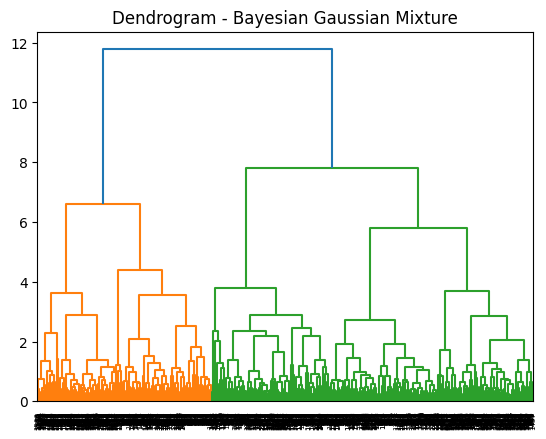

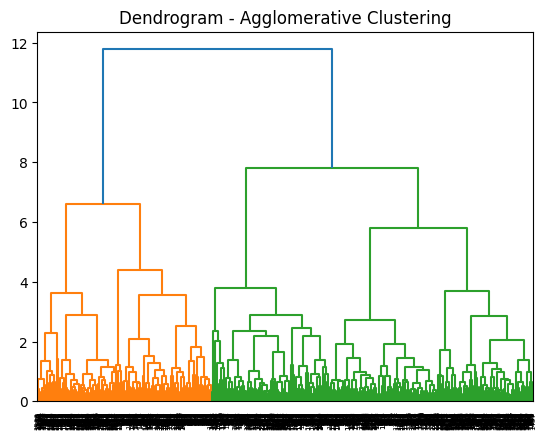

C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


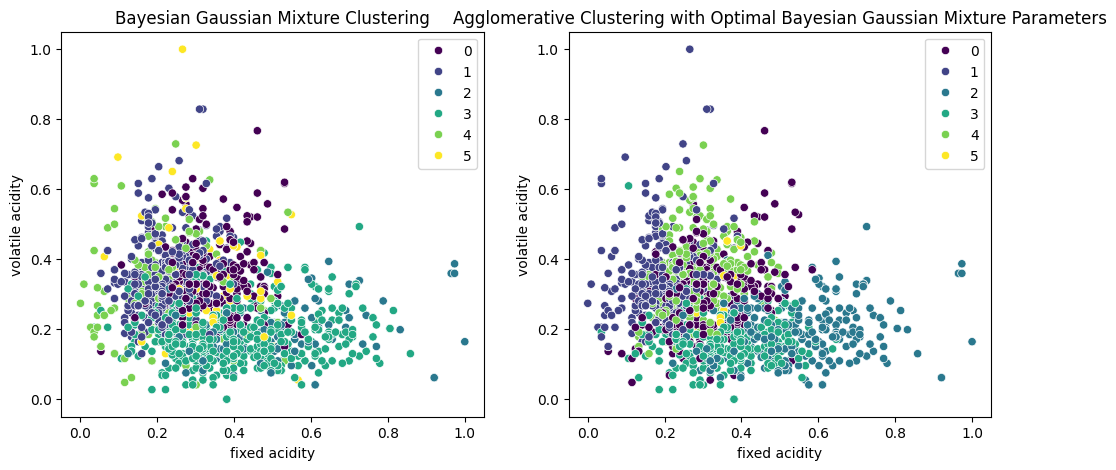

In [2]:
file = pd.read_csv('winequality-red.csv')
file = file.drop('quality', axis=1)

# Nastavení barev pro vizualizaci
barvy = {
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'yellow',
    5: 'purple',
    6: 'orange',
    7: 'pink',
    8: 'brown',
    9: 'cyan',
    10: 'magenta',
    11: 'lime',
    12: 'black'
}



plt.figure(figsize=(15, 30))
# Histogramy
for i, col in enumerate(file.columns):
    plt.subplot(9, 4, i + 1)
    sns.histplot(data=file[col], bins=8, color=barvy[i + 1], linewidth=5, edgecolor="white")
    plt.title(f'Histogram {col}')
plt.tight_layout()

# Boxploty
for i, col in enumerate(file.columns):
    plt.subplot(9, 4, len(file.columns) + i + 1)
    sns.boxplot(data=file[col], color=barvy[i + 1], width=0.5, linewidth=2, boxprops=dict(alpha=0.6))
    plt.title(f'Boxplot {col}')
plt.tight_layout()

# Violinploty
for i, col in enumerate(file.columns):
    plt.subplot(9, 4, 2 * len(file.columns) + i + 1)
    sns.violinplot(data=file[col], color=barvy[i + 1], width=0.5, linewidth=4)
    plt.title(f'Violinplot {col}')
plt.tight_layout()

# Uložení všech grafů do jednoho souboru
plt.savefig('combined_plots.png')
plt.close()

# Normalizace dat
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(file)
normalized_df = pd.DataFrame(normalized_data, columns=file.columns)

# Vytvoření histogramů pro normalizovaná data
plt.figure(figsize=(15, 30))
# Histogramy
for i, col in enumerate(normalized_df.columns):
    plt.subplot(9, 4, i + 1)
    sns.histplot(data=normalized_df[col], bins=8, color=barvy[i + 1], linewidth=5, edgecolor="white", stat="probability")
    plt.title(f'Histogram {col}')
plt.tight_layout()

# Boxploty
for i, col in enumerate(normalized_df.columns):
    plt.subplot(9, 4, len(normalized_df.columns) + i + 1)
    sns.boxplot(data=normalized_df[col], color=barvy[i + 1], width=0.5, linewidth=2, boxprops=dict(alpha=0.6))
    plt.title(f'Boxplot {col}')
plt.tight_layout()

# Violinploty
for i, col in enumerate(normalized_df.columns):
    plt.subplot(9, 4, 2 * len(normalized_df.columns) + i + 1)
    sns.violinplot(data=normalized_df[col], color=barvy[i + 1], width=0.5, linewidth=4)
    plt.title(f'Violinplot {col}')
plt.tight_layout()

# Uložení všech grafů do jednoho souboru
plt.savefig('combined_normalized_plots.png')
plt.close()


file = pd.read_csv('winequality-red.csv')

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(file)
normalized_df = pd.DataFrame(normalized_data, columns=file.columns)

# Vytvoření hybridního modelu klastrování s použitím Bayesovského algoritmu optimalizace a aglomerativního klastrování
X = normalized_df.drop('quality', axis=1)
y = normalized_df['quality']

def objective(trial):
    n_clusters_bgm = trial.suggest_int('n_clusters_bgm', 2, 10)
    
    bgm = BayesianGaussianMixture(n_components=n_clusters_bgm, random_state=42)
    bgm.fit(X)
    labels_bgm = bgm.predict(X)
    
    ch_bgm = calinski_harabasz_score(X, labels_bgm)
    
    return ch_bgm  # Maximizujeme Calinski-Harabasz skóre pro Bayesian Gaussian Mixture

study_bgm = optuna.create_study(direction='maximize')
study_bgm.optimize(objective, n_trials=50)

best_params_bgm = study_bgm.best_params

linkage_matrix_bgm = linkage(X, method='ward')
dendrogram(linkage_matrix_bgm)
plt.title('Dendrogram - Bayesian Gaussian Mixture')
plt.show()

linkage_matrix_ac = linkage(X, method='ward')
dendrogram(linkage_matrix_ac)
plt.title('Dendrogram - Agglomerative Clustering')
plt.show()

# Now, let's redefine labels_bgm after optimization
bgm = BayesianGaussianMixture(n_components=best_params_bgm['n_clusters_bgm'], random_state=42)
bgm.fit(X)
labels_bgm = bgm.predict(X)

ac = AgglomerativeClustering(n_clusters=best_params_bgm['n_clusters_bgm'], linkage='ward')
labels_ac = ac.fit_predict(X)

# Vizualizace výsledků klastrování
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=labels_bgm, palette='viridis')
plt.title('Bayesian Gaussian Mixture Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=labels_ac, palette='viridis')
plt.title('Agglomerative Clustering with Optimal Bayesian Gaussian Mixture Parameters')

plt.show()

In [6]:
print(best_params_bgm)
print(normalized_df.head())

{'n_clusters_bgm': 6}
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0       0.247788          0.397260         0.00        0.068493   0.106845  \
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates   
0             0.140845              0.098940  0.567548  0.606299   0.137725  \
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846

In [8]:
file = pd.read_csv('winequality-red.csv')

# Příprava dat pro klasifikaci
X = file.drop('quality', axis=1)
y = file['quality']

# Rozdělení dat na trénovací a testovací množiny
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializace klasifikačního modelu (např. Random Forest)
rf_classifier = RandomForestClassifier(random_state=42)

# Trénování modelu s 5-Fold cross-validation
cross_val_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Průměrná přesnost na trénovacích datech
average_accuracy = cross_val_scores.mean()

# Trénování finálního modelu na celém trénovacím datasetu
rf_classifier.fit(X_train, y_train)

# Predikce na testovacím datasetu
y_pred = rf_classifier.predict(X_test)

# Vyhodnocení výsledků
accuracy_test = accuracy_score(y_test, y_pred)
classification_report_test = classification_report(y_test, y_pred)

# Představení výsledků
print(f"Průměrná přesnost na trénovacích datech (cross-validation): {average_accuracy:.2f}")
print(f"Přesnost na testovacích datech: {accuracy_test:.2f}")
print("Classification Report na testovacích datech:")
print(classification_report_test)

Průměrná přesnost na trénovacích datech (cross-validation): 0.68
Přesnost na testovacích datech: 0.66
Classification Report na testovacích datech:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.69      0.66       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tomik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471